### spatial decision modeling

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box
from shapely.affinity import translate
from descartes import PolygonPatch
import random
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Simulation:
    def __init__(self,Map):
        self.Map = Map
        self.agents = list()
        
    def init(self):
        for agent in self.agents:
            agent.init(self.Map)
    
    def run(self,steps=10):
        for i in range(steps):
            for agent in self.agents:
                agent.run(self.Map)
            
    def plot(self,timestep=0):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_xlim([0,self.Map.maxx])
        ax.set_ylim([0,self.Map.maxy])
        ax.add_patch(PolygonPatch(self.Map.vector))
        ax.set_aspect('equal')
        
        for agent in self.agents:
            for point in agent.track:
                ax.add_patch(PolygonPatch(point.buffer(1),facecolor='red'))
        
        return fig, ax

In [3]:
class Map:
    def __init__(self,maxx,maxy):
        self.maxx = maxx
        self.maxy = maxy
        self.vector = box(0,0,maxx,maxy)
        self.raster = np.zeros((maxx,maxy))


In [4]:
class Agent:
    def __init__(self, name):
        self.name = name
        self.init_loc= None
        self.track = list()
    
    def location(self):
        if len(self.track)==0:
            coords = self.init_loc
        else:
            coords = self.track[-1]

        return Point(coords)
        
    def init(self,Map):
        """This function initializes an agent randomly."""
        minx, miny, maxx, maxy = Map.vector.bounds
        x = random.randint(minx,maxx)
        y = random.randint(miny,maxy)
        self.init_loc = Point(x,y)
    
    def run(self, Map):
        """This function defines what the agent does at a timestep"""
        xoff = random.choice([-1,1])*1
        yoff = random.choice([-1,1])*1
        self.track.append(translate(self.location(),xoff,yoff))

In [5]:
s = Simulation(Map(100,100))
s.agents = [Agent(name=x) for x in range(3)]

In [6]:
s.init()
s.run(500)

In [7]:
ps = list()
for agent in s.agents:
    for t in agent.track:
        ps.append({'geometry':t.buffer(1),'agent':agent.name})

In [8]:
import geopandas

In [9]:
gdf = geopandas.GeoDataFrame(ps)

In [10]:
gdf.shape

(1500, 2)

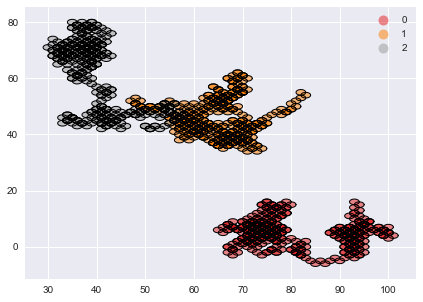

In [12]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
gdf.plot(ax=ax,column='agent',categorical=True,legend=True)